# 0. Введение

###  Конструирование признаков для данных о домах играет ключевую роль в анализе недвижимости и повышает эффективность моделей машинного обучения, помогая точнее оценивать цены на жилье, выявлять особенности рынка и потенциальные инвестиционные возможности.

# 1. Импорт базовых библиотек

In [445]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Импорт файла с данными и их проверка

In [446]:
file_path = r'E:\Портфолио\Преобразование данных в датафрейме ( очистка и конструирование признаков )\Housing_Data.csv'
df = pd.read_csv(file_path)
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# 3. Анализ данных

## 3.1 Корреляции

In [447]:
# Топ 10 признаков, которые лучше всех коррелируют с целевой переменной
columns = df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns
corr = df[columns].corr()['SalePrice'].sort_values(ascending=False)
corr.head(10)

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Name: SalePrice, dtype: float64

In [448]:
# Топ 10 признаков, которые хуже всех коррелируют с целевой переменной
corr.tail(10)

BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0.119814
Enclosed Porch    -0.128787
PID               -0.246521
Name: SalePrice, dtype: float64

# 4. Работа с выбросами

## 4.1 Поиск выбросов

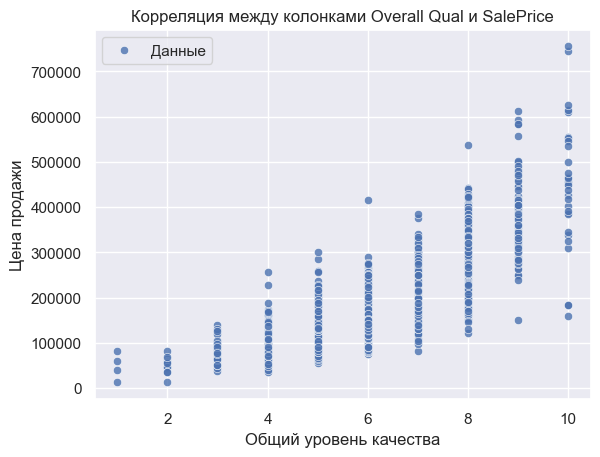

In [449]:
X = 'Overall Qual'
Y = 'SalePrice'

sns.set(style='darkgrid')
sns.scatterplot(data=df, x=X, y=Y, label='Данные', alpha=0.8)

plt.title(f'Корреляция между колонками {X} и {Y}')
plt.xlabel('Общий уровень качества')
plt.ylabel('Цена продажи')

plt.legend(loc='upper left')
plt.show()

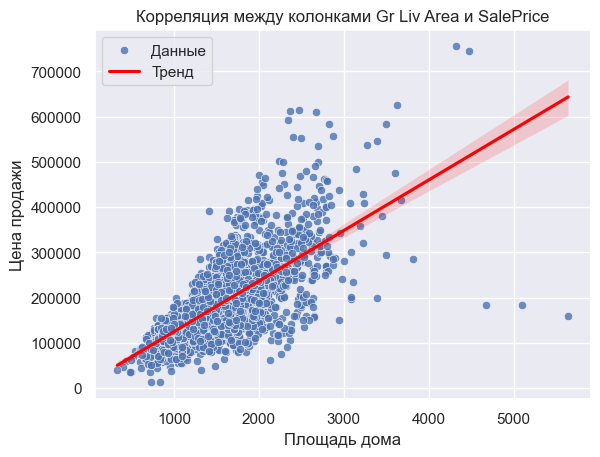

In [450]:
X = 'Gr Liv Area'
Y = 'SalePrice'

sns.set(style='darkgrid')
sns.scatterplot(data=df, x=X, y=Y, label='Данные', alpha=0.8)
sns.regplot(data=df, x=X, y=Y, scatter=False, color='red', label='Тренд')

plt.title(f'Корреляция между колонками {X} и {Y}')
plt.xlabel('Площадь дома')
plt.ylabel('Цена продажи')

plt.legend(loc='upper left')
plt.show()

## 4.2 Удаление выбросов

In [451]:
# поиск выбросов из первого графика
drop_ind =  df[ (df['Overall Qual'] > 8) & ( df['SalePrice'] < 200_000 ) ].index
df = df.drop(drop_ind, axis=0)
print(f'Выбросы были удалины. Индексы выбросов: {drop_ind}')

Выбросы были удалины. Индексы выбросов: Index([1182, 1498, 2180, 2181], dtype='int64')


In [452]:
# поиск выбросов из воторго графика
drop_ind = df[ (df['Gr Liv Area'] > 4_000) & ( df['SalePrice'] < 200_000 ) ].index
df = df.drop(drop_ind, axis=0)
print(f'Выбросы были удалины. Индексы выбросов: {drop_ind}')

Выбросы были удалины. Индексы выбросов: Index([], dtype='int64')


## 4.3 Проверка

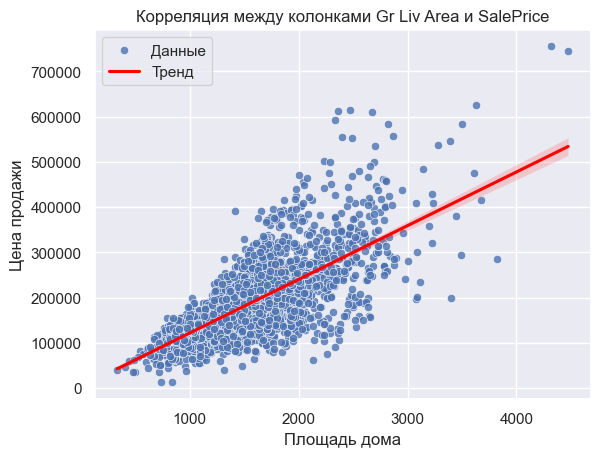

In [453]:
X = 'Gr Liv Area'
Y = 'SalePrice'

sns.set(style='darkgrid')
sns.scatterplot(data=df, x=X, y=Y, label='Данные', alpha=0.8)
sns.regplot(data=df, x=X, y=Y, scatter=False, color='red', label='Тренд')

plt.title(f'Корреляция между колонками {X} и {Y}')
plt.xlabel('Площадь дома')
plt.ylabel('Цена продажи')

plt.legend(loc='upper left')
plt.show()

### Как оказалось, выбросы из первого и второго графика оказались одни и те же

# 5. Работа с пустыми значениями

## 5.1 Поиск пустых значений

In [454]:
# функция для поиска пустых значений
def null_search(df):
    null_value = df.isnull().sum()
    percent_null_value = round(null_value/len(df)* 100, 2)
    type_data = df.dtypes

    data = {'Пустые значения': null_value, '% Пустых значений': percent_null_value,
            'Тип данных': type_data}

    df_info = pd.DataFrame(data)
    result = df_info[df_info['Пустые значения'] != 0].sort_values(by='Пустые значения', ascending=False)
    return result

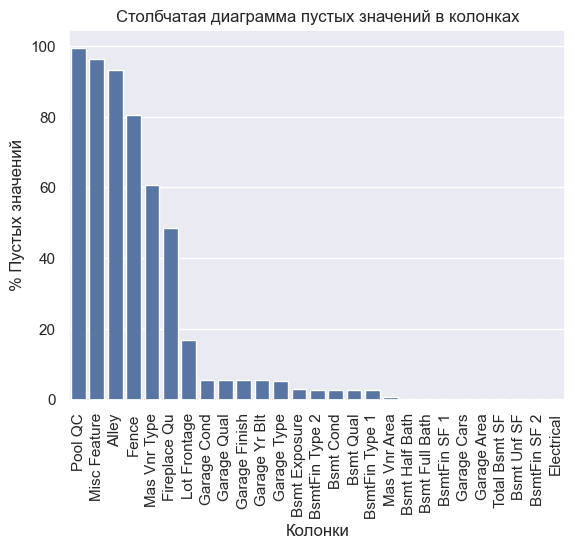

,Пустые значения,% Пустых значений,Тип данных
Pool QC,2914,99.59,object
Misc Feature,2821,96.41,object
Alley,2728,93.23,object
Fence,2354,80.45,object
Mas Vnr Type,1775,60.66,object
Fireplace Qu,1422,48.60,object
Lot Frontage,489,16.71,float64
Garage Cond,159,5.43,object
Garage Qual,159,5.43,object
Garage Finish,159,5.43,object


In [455]:
# функция для вывода диаграммы и пустых значений в df
def chart():
    
    # создание df с информацией о пустых значениях
    info = null_search(df)
    
    sns.set(style='darkgrid')
    sns.barplot(data=info, x=info.index, y='% Пустых значений', color='b')

    plt.title('Столбчатая диаграмма пустых значений в колонках')
    plt.ylabel('% Пустых значений')
    plt.xlabel('Колонки')

    plt.xticks(rotation=90)
    plt.show()
    
    return info
    
chart()

In [456]:
# Удаление колонки PID из-за ненадобности
df = df.drop('PID', axis=1)
df.head(1)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


# 6. Замена и удаление пустых значений из-за особенности Data Frame

In [457]:
# для числовых колонок - заполнить нулями
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', \
                 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [458]:
# для текстовых колонок
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', \
                 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [459]:
# замена пустых значений
gar_str_cols = ['Garage Type', 'Garage Finish','Garage Qual','Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [460]:
# замена пустых значений
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [461]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [462]:
# удаление строчек, у которых % пустых значений = 1%
columns = info[info['% Пустых значений'] <= 1].index
df = df.dropna(axis=0, subset=columns)

In [463]:
# удаление колонок из-за большого кол-ва пропущенных значений
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'], axis=1)

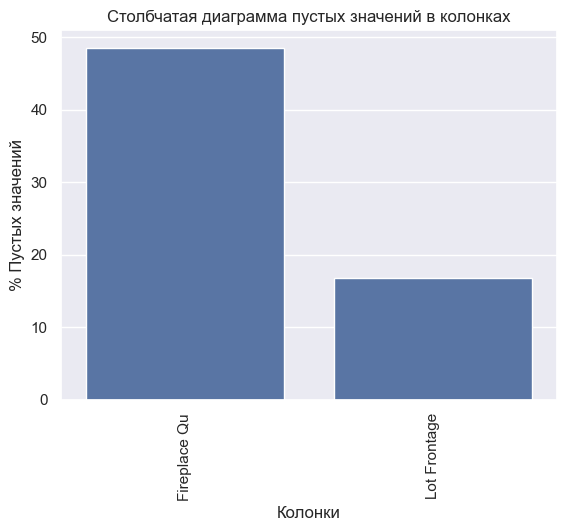

,Пустые значения,% Пустых значений,Тип данных
Fireplace Qu,1420,48.56,object
Lot Frontage,489,16.72,float64


In [464]:
chart()

# 7. Работа с оставшимися колонками

In [465]:
# кол-во уникальных значений в колонке Fireplace Qu
df['Fireplace Qu'].value_counts()

Fireplace Qu
Gd    740
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64

In [466]:
# замена пустых значений
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')
df['Fireplace Qu'].value_counts()

Fireplace Qu
None    1420
Gd       740
TA       600
Fa        75
Po        46
Ex        43
Name: count, dtype: int64

In [467]:
# группировка по столбцу 'Neighborhood' и затем для каждой группы (т.е. для каждого района)
# а затем заполняет пропущенные значения в столбце 'Lot Frontage' средним значением 
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(\
                        lambda value: value.fillna(value.mean()))

# запонение оставшихся значений нулями
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [468]:
null_search(df)

,Пустые значения,% Пустых значений,Тип данных


# 6. Работа с категориальными переменными

## 6.1 Функция для поиска всех текстовых колонок

In [469]:
def search_text_columns(df):
    
    # нахождение всех колонок с типом данных object
    text_columns = df.select_dtypes(exclude='number').columns

    column = []
    value = []

    for col in text_columns:
        unique = df[col].unique()
        unique = ', '.join(unique)

        column.append(col)
        value.append(unique)

    un_dict = {'Назв. колонок': column, 'Уник. значения': value}
    un_df = pd.DataFrame(un_dict)

    un_df['Кол-во уник. значений'] = un_df['Уник. значения'].apply(lambda x: len(set(x.split(', '))))
    un_df.set_index('Назв. колонок', inplace=True)
    return un_df

In [470]:
search_text_columns(df)

,Уник. значения,Кол-во уник. значений
Назв. колонок,,
MS Zoning,"RL, RH, FV, RM, C (all), I (all), A (agr)",7
Street,"Pave, Grvl",2
Lot Shape,"IR1, Reg, IR2, IR3",4
Land Contour,"Lvl, HLS, Bnk, Low",4
Utilities,"AllPub, NoSewr, NoSeWa",3
Lot Config,"Corner, Inside, CulDSac, FR2, FR3",5
Land Slope,"Gtl, Mod, Sev",3
Neighborhood,"NAmes, Gilbert, StoneBr, NWAmes, Somerst, BrDa...",28
Condition 1,"Norm, Feedr, PosN, RRNe, RRAe, Artery, PosA, R...",9


In [471]:
# разделение колонок на текстовые и числовые
my_object_df = df.select_dtypes(include='object')
my_numeric_df = df.select_dtypes(exclude='object')

In [472]:
# кодирование
df_objects_dummies = pd.get_dummies(my_object_df, drop_first=True, dtype=int)
df_objects_dummies.head()

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [473]:
# объединение числовых значений и кодированных
final_df = pd.concat([my_numeric_df,df_objects_dummies],axis=1)

# 7. Сохранение файла

In [474]:
import os

# Проверяем, существует ли папка, и создаем ее, если необходимо
folder_path = r'E:\Портфолио\Преобразование данных в датафрейме ( очистка и конструирование признаков )'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Сохраняем DataFrame в формате CSV
final_df.to_csv(os.path.join(folder_path, 'Final_df.csv'), index=False)
print(f'Таблица сохранена!')

Таблица сохранена!


# 8. Вывод

### Преобразование данных в DataFrame является неотъемлемой частью анализа данных и подготовки их к дальнейшему использованию. Очистка данных позволяет удалить неполные, ошибочные или дублирующиеся записи, обеспечивая более точный анализ. Конструирование признаков позволяет создавать новые полезные переменные на основе имеющихся данных, что может улучшить процесс анализа и повысить производительность моделей машинного обучения. Важность этого процесса заключается в том, что качество данных напрямую влияет на результаты анализа и прогнозирования, делая его критическим шагом в цикле работы с данными.